In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df.head()

c:\users\yq\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [3]:
features = list(df)
print(features)
print(len(features))

['channelGrouping', 'date', 'device', 'fullVisitorId', 'geoNetwork', 'sessionId', 'socialEngagementType', 'totals', 'trafficSource', 'visitId', 'visitNumber', 'visitStartTime']
12


## Look at data column by column

### Channel Grouping

In [4]:
column_0 = df.iloc[:, 0]
print(pd.isnull(column_0).values.any())
print(column_0.unique())

False
['Organic Search' 'Referral' 'Paid Search' 'Affiliates' 'Direct' 'Display'
 'Social' '(Other)']


In [5]:
column_0.describe()

count             903653
unique                 8
top       Organic Search
freq              381561
Name: channelGrouping, dtype: object

Organic Search    381561
Social            226117
Direct            143026
Referral          104838
Paid Search        25326
Affiliates         16403
Display             6262
(Other)              120
Name: channelGrouping, dtype: int64

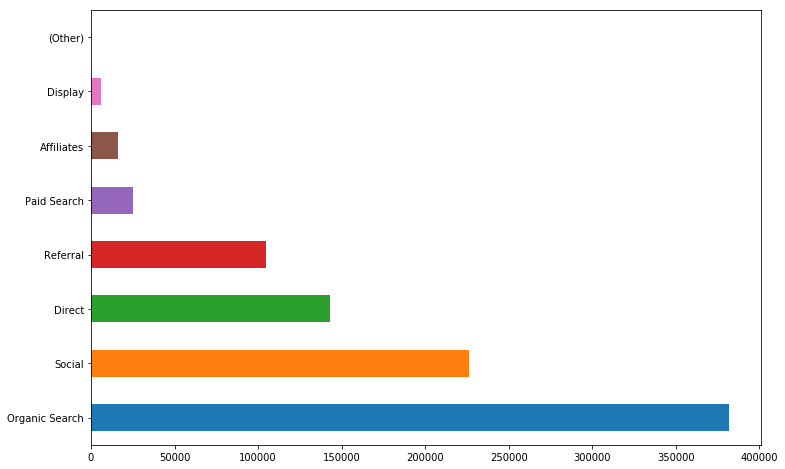

In [6]:
column_0.value_counts().plot(kind="barh", figsize=(12,8))

column_0.value_counts()

### Date

In [7]:
column_1 = df.iloc[:, 1]
print(pd.isnull(column_1).values.any())
print(column_1.head())

False
0    20160902
1    20160902
2    20160902
3    20160902
4    20160902
Name: date, dtype: int64


In [8]:
column_1 = pd.to_datetime(column_1.apply(lambda x: "{}-{}-{}".format(str(x)[:4], str(x)[4:6], str(x)[6:])))
column_1.head()

0   2016-09-02
1   2016-09-02
2   2016-09-02
3   2016-09-02
4   2016-09-02
Name: date, dtype: datetime64[ns]

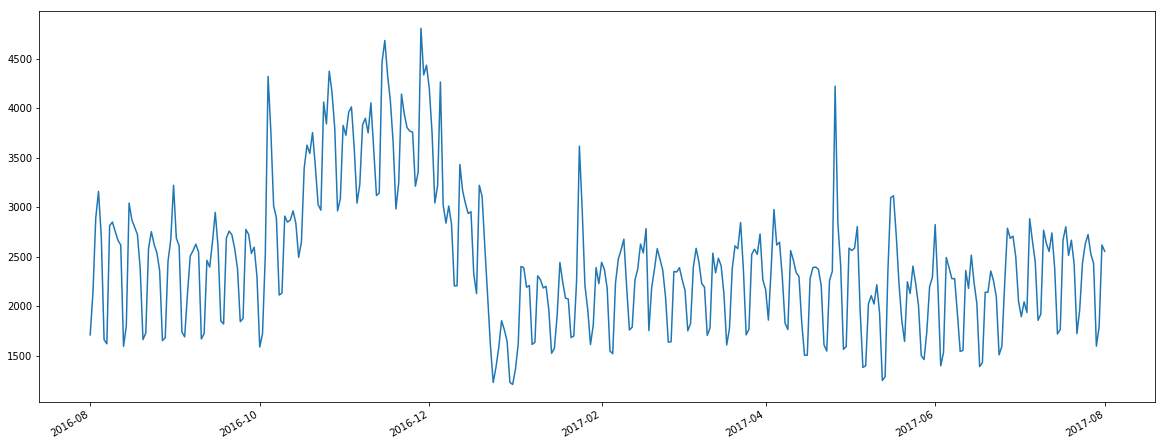

In [9]:
column_1.value_counts().plot(kind="line", figsize=(20,8))

In [10]:
column_1.value_counts().head(10)

2016-11-28    4807
2016-11-15    4685
2016-11-14    4466
2016-11-30    4435
2016-10-26    4375
2016-11-29    4337
2016-11-16    4334
2016-10-04    4322
2016-12-05    4265
2017-04-26    4224
Name: date, dtype: int64

### Device

In [11]:
column_2 = df.iloc[:, 2]
print(pd.isnull(column_2).values.any())
print(column_2.head())

False
0    {"browser": "Chrome", "browserVersion": "not a...
1    {"browser": "Firefox", "browserVersion": "not ...
2    {"browser": "Chrome", "browserVersion": "not a...
3    {"browser": "UC Browser", "browserVersion": "n...
4    {"browser": "Chrome", "browserVersion": "not a...
Name: device, dtype: object


In [12]:
column_2 = column_2.values

In [13]:
column_2_features = [x.split(":")[0].strip('{}" ') for x in column_2[0].split(",")]
column_2_features

['browser',
 'browserVersion',
 'browserSize',
 'operatingSystem',
 'operatingSystemVersion',
 'isMobile',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'language',
 'screenColors',
 'screenResolution',
 'deviceCategory']

In [14]:
column_2_values = np.array([np.array([x.split(":")[-1].strip('{}" ') for x in y.split(",")]) for y in column_2])
column_2_values.shape

(903653, 16)

In [15]:
column_2 = dict(zip(column_2_features, column_2_values.T))
del column_2_features, column_2_values

In [16]:
column_2 = pd.DataFrame(column_2)
column_2.head()

,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,false,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,false,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,false,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,UC Browser,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,false,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
4,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,true,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile


In [18]:
column_2 = column_2.drop(["browserVersion", "browserSize", "operatingSystemVersion", "mobileDeviceBranding",
                         "mobileDeviceModel", "mobileInputSelector", "mobileDeviceInfo", "mobileDeviceMarketingName",
                         "flashVersion", "language", "screenColors", "screenResolution"], axis=1)

In [19]:
column_2.head(10)

,browser,operatingSystem,isMobile,deviceCategory
0,Chrome,Windows,false,desktop
1,Firefox,Macintosh,false,desktop
2,Chrome,Windows,false,desktop
3,UC Browser,Linux,false,desktop
4,Chrome,Android,true,mobile
5,Chrome,Windows,false,desktop
6,Chrome,Windows,false,desktop
7,Chrome,Windows,false,desktop
8,Internet Explorer,Windows,false,desktop
9,Firefox,Windows,false,desktop


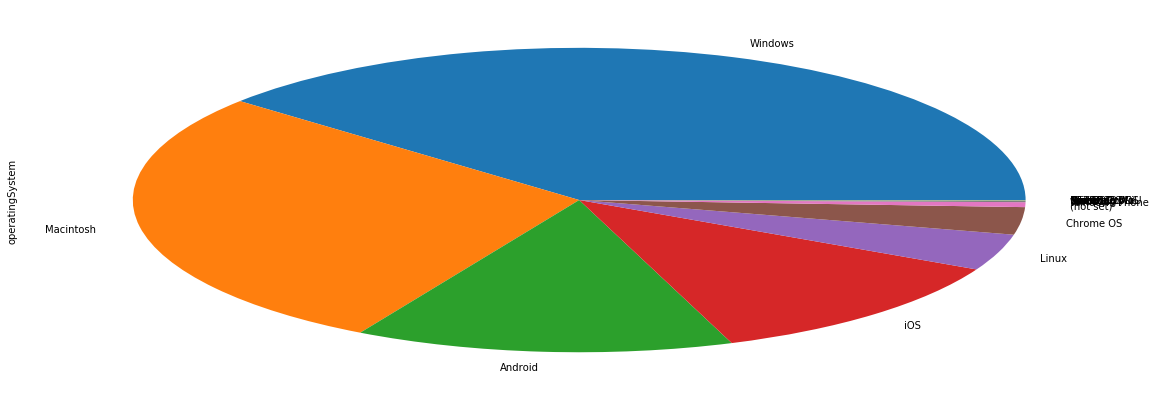

In [29]:
column_2.iloc[:, 1].value_counts().plot(kind="pie", figsize=(20, 7))

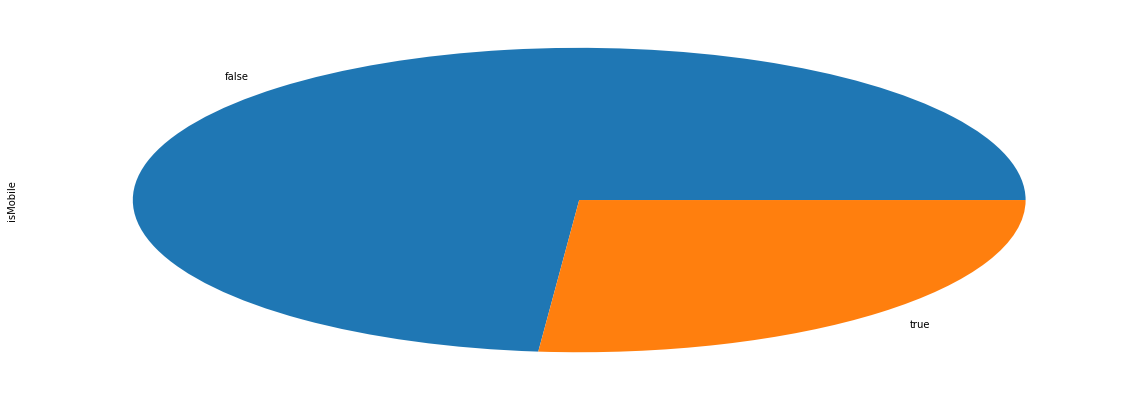

In [31]:
column_2.iloc[:, 2].value_counts().plot(kind="pie", figsize=(20, 7))

### Full Visitor ID

In [ ]:
column_3 = df.iloc[:, 3]

